In [265]:
import numpy as np
import pandas as pd
import matplotlib
import math
from sklearn import model_selection, ensemble, metrics, linear_model, preprocessing
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)

In [61]:
pd.set_option('display.max_rows', 10)

In [3]:
data = pd.read_csv('dataset/train.csv')

In [4]:
test = pd.read_csv('dataset/test.csv')

In [5]:
# Data contains numerical values, except for "galaxy" and 
# "galactic year", which represent name and ordinal relationship
print(data.dtypes.values)
print(test.dtypes.values)

[dtype('int64') dtype('O') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('

In [587]:
#Test dataset contains objects only of latest 10 years,
#including unmentioned in train data latest year 1016064
unique_years = data['galactic year'].unique()
print (unique_years)
print (unique_years.shape)

print(np.sort(test['galactic year'].unique()))
print(test['galactic year'].unique().shape)

unique_names = data['galaxy'].unique()
unique_names = np.sort(unique_names)
print (unique_names[:5])
print(unique_names.shape)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
(26,)
[18 19 20 21 22 23 24 25 26 27]
(10,)
['Andromeda Galaxy (M31)' 'Andromeda I' 'Andromeda II' 'Andromeda III'
 'Andromeda IX']
(181,)


In [590]:
#Let's map all galactic years to years with increment of 1 year
# and map all galaxies to their unique integer key

#dictionary for replacement of galactic years with normal years
di = {val: ind+1 for ind, val in enumerate(np.append(unique_years,
                                                     1016064))}
#dictionary for replacement of names with integer keys
di_names = {val: ind+1 for ind, val in enumerate(unique_names)}
data.replace({'galactic year':di}, inplace=True)
test.replace({'galactic year':di}, inplace=True)

data.replace({'galaxy':di_names}, inplace=True)
test.replace({'galaxy':di_names}, inplace=True)

In [598]:
data[data['galaxy']==59].isna().sum(axis=1)

165     35
189     59
416     68
574     68
762     68
        ..
2677    66
2866     5
3019    66
3545     5
3678     5
Length: 19, dtype: int64

In [6]:
#Let's see how much data is missing for each feature
data.isna().mean().sort_values()

galactic year                                                                              0.000000
y                                                                                          0.000000
galaxy                                                                                     0.000000
existence expectancy index                                                                 0.000259
existence expectancy at birth                                                              0.000259
Gross income per capita                                                                    0.007245
Income Index                                                                               0.007245
Expected years of education (galactic years)                                               0.034411
Mean years of education (galactic years)                                                   0.093920
Intergalactic Development Index (IDI)                                                      0.101164


In [9]:
#Are there any new unknown galaxies in the test dataset?
#The answer is NO
a = set(data['galaxy'].unique())
b = set(test['galaxy'].unique())
b.issubset(a)

True

galactic year
990025     0.081928
991020     0.082005
992016     0.082007
993012     0.082011
994009     0.082023
995006     0.082027
996004     0.082088
997002     0.082100
998001     0.082106
999000     0.082111
1000000    0.082117
1001000    0.082297
1002001    0.082297
1003002    0.082300
1004004    0.082291
1005006    0.082288
1006009    0.082435
1007012    0.081335
1008016    0.081379
1009020    0.081381
1010025    0.081331
1011030    0.080062
1012036    0.094917
1013042    0.098005
1014049    0.087332
1015056    0.080857
Name: y, dtype: float64


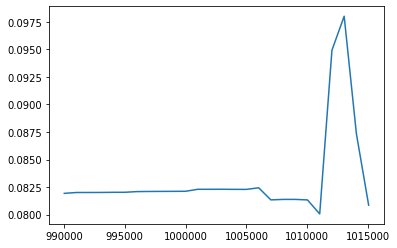

In [41]:

y_dist = data.groupby(['galactic year'])['y'].mean()
print (y_dist)
plt.plot(y_dist)

galaxy
Andromeda Galaxy (M31)                  0.043539
Andromeda I                             0.049126
Andromeda II                            0.176689
Andromeda III                           0.117387
Andromeda IX                            0.166813
                                          ...   
Ursa Major II Dwarf                     0.190628
Ursa Minor Dwarf                        0.051538
Virgo I                                 0.042337
Willman 1                               0.055283
Wolf-Lundmark-Melotte (WLM, DDO 221)    0.044738
Name: y, Length: 181, dtype: float64


(array([125.,  21.,   8.,  10.,   8.,   6.,   0.,   2.,   0.,   1.]),
 array([0.03693184, 0.07251439, 0.10809694, 0.14367949, 0.17926205,
        0.2148446 , 0.25042715, 0.2860097 , 0.32159225, 0.3571748 ,
        0.39275736]),
 <a list of 10 Patch objects>)

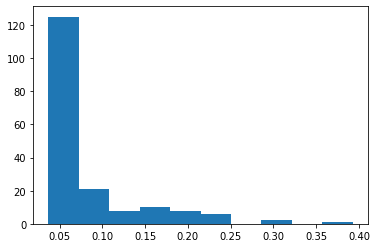

In [266]:
y_dist = data.groupby(['galaxy'])['y'].mean()
print(y_dist)
plt.hist(y_dist)

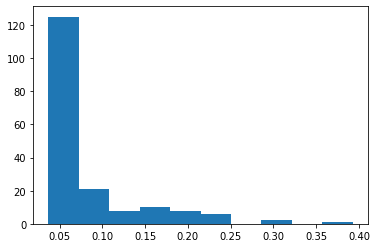

In [425]:
y_dist = data.groupby(['galaxy'])['y'].mean()
#print(y_dist)
plt.hist(y_dist)
plt.show()

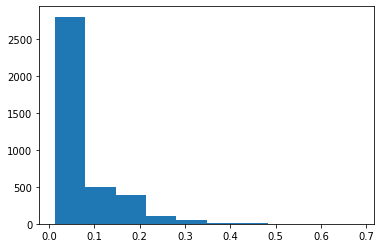

In [426]:
plt.hist(y)
plt.show()

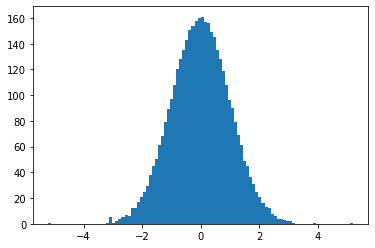

In [269]:
# transforming target y to follow a normal distribution
# to improve the quality of linear regression
from sklearn.preprocessing import QuantileTransformer, quantile_transform
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal' )
plt.hist(qt.fit_transform(y.reshape(-1, 1)), bins=100)
plt.show()

In [56]:
data.iloc[:, -1].describe()

count    3865.000000
mean        0.082773
std         0.063415
min         0.013036
25%         0.047889
50%         0.057820
75%         0.087389
max         0.683813
Name: y, dtype: float64

In [58]:
(unique_years - 990025)/1001

array([ 0.        ,  0.99400599,  1.98901099,  2.98401598,  3.98001998,
        4.97602398,  5.97302697,  6.97002997,  7.96803197,  8.96603397,
        9.96503497, 10.96403596, 11.96403596, 12.96403596, 13.96503497,
       14.96603397, 15.96803197, 16.97002997, 17.97302697, 18.97602398,
       19.98001998, 20.98401598, 21.98901099, 22.99400599, 24.        ,
       25.00599401])

In [25]:
#With the exception of one galaxy NGC 5253 (drop it?), there at least 17 points for each galaxy - nice
print(data.groupby(['galaxy'])['galactic year'].count().sort_values())

galaxy
NGC 5253                                        1
Wolf-Lundmark-Melotte (WLM, DDO 221)           17
Andromeda XXI[57]                              17
Andromeda X                                    17
Aquarius Dwarf Galaxy (DDO 210)                17
Sagittarius Dwarf Irregular Galaxy (SagDIG)    17
Pegasus Dwarf Irregular (DDO 216)              17
Perseus I (Andromeda XXXIII)                   18
Canes Venatici I Dwarf                         18
Cassiopeia Dwarf (Cas dSph, Andromeda VII)     18
Cassiopeia II (Andromeda XXX)                  18
Columba I                                      18
Fornax Dwarf (E356-G04)                        18
Hydra II                                       18
Lacerta I (Andromeda XXXI)                     18
Leo I Dwarf (DDO 74, UGC 5470)                 18
Barnard's Galaxy (NGC 6822)                    18
Leo T Dwarf                                    18
Leo V Dwarf                                    18
M110 (NGC 205)                             

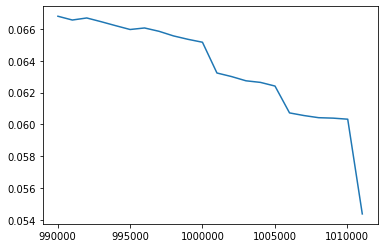

In [43]:
galslice = data[data['galaxy'] == 'Sextans B (UGC 5373)']
plt.plot(galslice['galactic year'], galslice['y'])

Let's try replacing all NaN in data with zeros. Furthermore in this part I assume that the target variable y does not depend on the galactic year nor the galaxy the data comes from. The assumption is that the final index is calculated solely based on the statistics of a given galaxy in a given year. In other words, I believe here that y is non-discriminative towards what galaxy and which year data is drawn from. 

In [329]:
from sklearn.model_selection import cross_val_score as CVS
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.compose import TransformedTargetRegressor as TransTargReg

# getting X and y
X = data.fillna(value=0).iloc[:, 2:-1].values
y = data.fillna(value=0).iloc[:, -1].values

#creating a target transformer (normal)
qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal' )


# shortcut for scorer
nrmse = 'neg_root_mean_squared_error'
# normalize
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

(X_train, X_test, y_train,
 y_test) = model_selection.train_test_split(X, y,
          test_size = 0.2, shuffle=True, random_state=425)

lr = TransTargReg(regressor=linear_model.LinearRegression(),
                  transformer=qt)
lr.fit(X_train, y_train)

train_rmse = MSE(y_train, lr.predict(X_train))**0.5
test_rmse = MSE(y_test, lr.predict(X_test))**0.5
print(train_rmse, 'Linreg on train data')
print(test_rmse, 'Linreg on test data\n')

SGDreg = TransTargReg(regressor=linear_model.SGDRegressor(loss='huber',
                                   penalty='l2',
                                   alpha=0.01,
                                   epsilon=0.3,
                                   learning_rate='adaptive'),
                      transformer=qt)
SGDreg.fit(X_train, y_train)


train_rmse = MSE(y_train, SGDreg.predict(X_train))**0.5
test_rmse = MSE(y_test, SGDreg.predict(X_test))**0.5
print(train_rmse, 'SGDreg on train data')
print(test_rmse, 'SGDreg on test data')



0.03452235167623197 Linreg on train data
0.037545690346621606 Linreg on test data

0.033477194937087264 SGDreg on train data
0.03684363184971296 SGDreg on test data


In [555]:
%%time

# Tuning hyperparameters of an SGD regressor
param_grid = {
    'regressor__loss': ['huber', 'squared_loss', 'epsilon_insensitive'],
    'regressor__penalty': ['l2', 'l1', 'elasticnet'],
    'regressor__alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 0.00001, 0.000001],
    'regressor__epsilon': [0.1, 0.01, 0.001, 0.3, 0.5],
    'regressor__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'regressor__tol': [1e-4, 1e-3, 1e-2],
    'regressor__epsilon':[0.1, 0.01, 0.5, 1, 1.5, 2, 2.5], 
    'regressor__eta0': [0.01, 0.1, 1, 0.0001]
}
SGDreg_GSCV = model_selection.GridSearchCV(SGDreg, param_grid=param_grid, n_jobs=3, scoring='neg_root_mean_squared_error')
SGDreg_GSCV.fit(X_train, y_train)

CPU times: user 7min 54s, sys: 14.5 s, total: 8min 8s
Wall time: 4h 22min 38s


GridSearchCV(cv=None, error_score=nan,
             estimator=TransformedTargetRegressor(check_inverse=True, func=None,
                                                  inverse_func=None,
                                                  regressor=SGDRegressor(alpha=0.01,
                                                                         average=False,
                                                                         early_stopping=False,
                                                                         epsilon=0.3,
                                                                         eta0=0.01,
                                                                         fit_intercept=True,
                                                                         l1_ratio=0.15,
                                                                         learning_rate='adaptive',
                                                                         loss='huber',
      

In [559]:
MSE(y_test, SGDreg_GSCV.best_estimator_.predict(X_test))**0.5

0.03586419314511298

In [280]:
print(SGDreg_GSCV.best_params_)
print(SGDreg_GSCV.best_score_)

{'regressor__loss': 'huber'}
-0.03415186563078466


In [321]:
#Let's use RandomForest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=300,
                              criterion='mse',
                              max_depth=None,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              max_features=26,
                              n_jobs=3)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=26, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=3, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [322]:
print(MSE(y_train, forest.predict(X_train))**0.5)
print(MSE(y_test, forest.predict(X_test))**0.5)

0.010259119702342894
0.028155913993791946


In [343]:
#XGBoost
import xgboost as xgb
XGB = TransTargReg(xgb.XGBRegressor(max_depth=5,
    learning_rate=0.1,
    n_estimators=2000,
    verbosity=1,
    silent=None,
    objective='reg:squarederror',
    booster='gbtree',
    n_jobs=3,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=0.5,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=42,
    seed=None,
    missing=None,
    importance_type='gain'),
                   qt)
XGB.fit(X_train, y_train)

print(MSE(y_train, XGB.predict(X_train))**0.5)
print(MSE(y_test, XGB.predict(X_test))**0.5)

0.0003990202436867411
0.02735101354723755


Text(0.5, 1.0, 'Existence expectancy index')

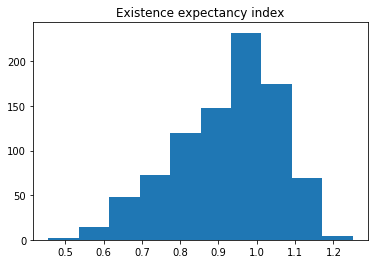

In [363]:
plt.hist(test.iloc[:, 2])
plt.title('Existence expectancy index')

In [331]:
#GridSearch for XGBoost RF hyperparameters
param_grid = {
    'regressor__max_depth': [2,4,6,8,10],
    'regressor__learning_rate': [0.1],
    'regressor__n_estimators': [200, 400, 800, 1200],
}
XGB_GSCV = model_selection.GridSearchCV(XGB, param_grid=param_grid, n_jobs=3, scoring='neg_root_mean_squared_error')
XGB_GSCV.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=TransformedTargetRegressor(check_inverse=True, func=None,
                                                  inverse_func=None,
                                                  regressor=XGBRegressor(base_score=0.5,
                                                                         booster='gbtree',
                                                                         colsample_bylevel=1,
                                                                         colsample_bynode=1,
                                                                         colsample_bytree=1,
                                                                         gamma=0,
                                                                         importance_type='gain',
                                                                         learning_rate=0.1,
                                                                         max_del

In [428]:
XGB_GSCV.best_params_

{'regressor__learning_rate': 0.1,
 'regressor__max_depth': 4,
 'regressor__n_estimators': 400}

In [337]:
MSE(y_test, XGB_GSCV.best_estimator_.predict(X_test))**0.5

0.030103865780963007

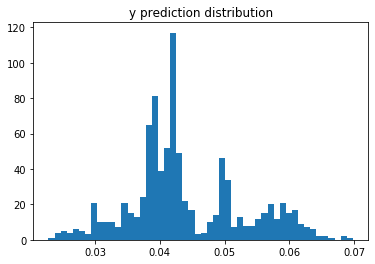

In [360]:
#
y_tpred = XGB.predict(test.iloc[:, 2:].values)
plt.hist(y_tpred, bins=50)
plt.title('y prediction distribution')
plt.show()

## Part 2 

In [495]:
#alpha is the coefficient before each E_i in calculating
#the likely index increase \Delta y_i multiplied by 1000
def P(y):
    return -np.log(y + 0.01) + 3
def alpha(y):
    return P(y)**2
p2slice = test.iloc[:, 2:3]
p2slice['y pred'] = pd.Series(y_tpred)
p2slice['alpha'] = pd.Series([alpha(x) for x in p2slice['y pred']])

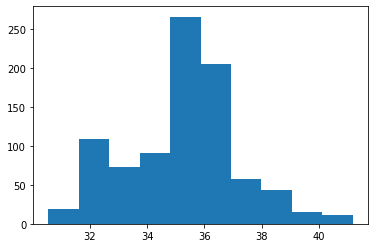

In [496]:
plt.hist(p2slice['alpha'])
plt.show()

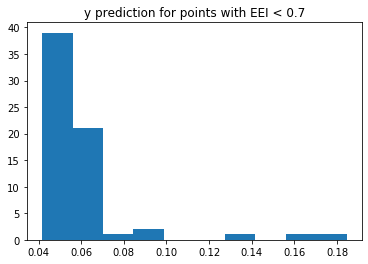

In [475]:
#finding points with EEI < 0.7
a = test.copy()
a['order index'] = pd.Series(test.index)

a = a.fillna(value=0)
EEI = a[(a.iloc[:, 2] < 0.7) & (a.iloc[:, 2] != 0)]

scaler = preprocessing.StandardScaler()
EEI = scaler.fit_transform(EEI.iloc[:, 2:-1])
y_eei = XGB.predict(EEI)

plt.hist(y_eei)
plt.title('y prediction for points with EEI < 0.7')
plt.show()

In [474]:
#First 66 points in test are actually the points that have EEI < 0.7
indices = a[(a.iloc[:, 2] < 0.7) & (a.iloc[:, 2] != 0)]['order index']
np.array_equal(np.array(indices), np.array(range(66)))

True

In [551]:
#how many rows are there with certain alpha values out of
#the ones with EEI < 0.7
p2slice[(p2slice['alpha']>33.76) & (p2slice.iloc[:, 0]<0.7)]

,existence expectancy index,y pred,alpha
0,0.456086,0.049377,33.917299
1,0.529835,0.047134,34.367255
2,0.560976,0.048802,34.030714
3,0.565910,0.049323,33.927881
4,0.588274,0.036177,36.908911
...,...,...,...
58,0.684616,0.022826,41.171827
60,0.685613,0.038868,36.223904
62,0.688025,0.035104,37.195049
63,0.692317,0.040405,35.852042


In [552]:
p2slice[(p2slice['alpha']>33.76)]

,existence expectancy index,y pred,alpha
0,0.456086,0.049377,33.917299
1,0.529835,0.047134,34.367255
2,0.560976,0.048802,34.030714
3,0.565910,0.049323,33.927881
4,0.588274,0.036177,36.908911
...,...,...,...
885,NaN,0.047341,34.324773
886,NaN,0.047341,34.324773
887,NaN,0.047341,34.324773
888,NaN,0.047341,34.324773


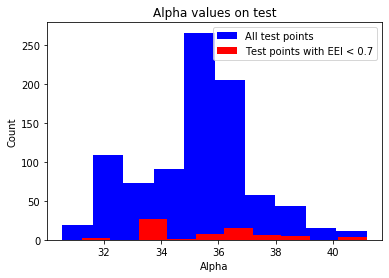

In [521]:
plt.hist(p2slice['alpha'], label='All test points', color='b')
plt.hist(p2slice.iloc[:66, -1],
         label ='Test points with EEI < 0.7', color='r')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Count')
plt.title('Alpha values on test')
plt.show()